In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Obtención de los datos

In [44]:
# Leer los datos
data = pd.read_csv('datos_2023.csv', delimiter=';', encoding='ISO-8859-1', dtype={'superficie_km2': float})

# Filtra los datos para obtener solo los municipios
municipios_data = data[data['Serie'] == 'Municipios'][data['Nombre'] != 'Madrid']

# Selecciona las columnas deseadas
selected_columns = ['Serie', 'Nombre', 'superficie_km2', 'ocupados_primario',
                    'ocupados_secundario', 'ocupados_terciario', 'ocupados_total',
                     'sup_explotaciones_agricolas_total', 'sup_explotaciones_agricolas_huertos_consumo_propio', 
                     'sup_total_indust', 'unidades_productivas_primario','unidades_productivas_secundario', 
                     'unidades_productivas_terciario', 'unidades_productivas_total']

# Selecciona las columnas deseadas del DataFrame de municipios
clustering_data = municipios_data[selected_columns]

C:\Users\ana\AppData\Local\Temp\ipykernel_16940\214151643.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  municipios_data = data[data['Serie'] == 'Municipios'][data['Nombre'] != 'Madrid']


## EDA

In [57]:
# Crear las nuevas características
sup_utiles_ha = clustering_data['sup_explotaciones_agricolas_total'] - clustering_data['sup_explotaciones_agricolas_huertos_consumo_propio']
sup_utiles_agric_km2 = sup_utiles_ha/100
# print(clustering_data['Nombre'][25])
# print(sup_utiles_agric_km2[25])
# print(clustering_data['superficie_km2'][25])
clustering_data.loc[:, 'superficie_agricola_ratio'] = np.where(clustering_data['superficie_km2'] != 0, sup_utiles_agric_km2 / clustering_data['superficie_km2'], 0)

# print(clustering_data['superficie_agricola_ratio'][25])
sup_utiles_indust_km2 = clustering_data['sup_total_indust']/1000
clustering_data.loc[:, 'superficie_industrial_ratio'] = np.where(clustering_data['superficie_km2'] != 0, sup_utiles_agric_km2 / clustering_data['superficie_km2'], 0)

# Indicadores de productividad relativa de cada sector
# clustering_data.loc[:, 'productividad_ratio'] = clustering_data['ocupados_total']/clustering_data['unidades_productivas_total']
# print(clustering_data['productividad_ratio'])
for sector in ['primario', 'secundario', 'terciario']:
    clustering_data.loc[:, f'ocupados_{sector}'] = np.where(clustering_data[f'ocupados_{sector}'] != 0, clustering_data[f'ocupados_{sector}'] / clustering_data[f'ocupados_total'], 0)
    clustering_data.loc[:, f'productividad_{sector}_ratio'] = np.where(clustering_data[f'productividad_ratio'] != 0, clustering_data[f'prod_{sector}'] / clustering_data[f'productividad_ratio'], 0)
# print(clustering_data['productividad_terciario_ratio'][6 :])
# print(clustering_data['productividad_ratio'][6 :])

# Ratio de ocupados y unidades productivas por sector
# for sector in ['primario', 'secundario', 'terciario']:
#     clustering_data[f'empleo_{sector}_ratio'] = np.where(clustering_data[f'ocupados_{sector}'] != 0, clustering_data[f'ocupados_{sector}'] / clustering_data[f'unidades_productivas_{sector}'], 0)


18     1.004813
19     1.064647
20     0.932141
21     1.007913
22     1.090644
         ...   
186    0.977178
187    0.889262
188    0.994422
189    1.103448
190    0.922927
Name: productividad_terciario_ratio, Length: 172, dtype: float64
18     4.699415
19     2.845528
20     3.745213
21     2.106766
22     2.822581
         ...   
186    1.677165
187    3.701357
188    2.816555
189    3.222222
190    3.178771
Name: productividad_ratio, Length: 172, dtype: float64


C:\Users\ana\AppData\Local\Temp\ipykernel_16940\29330227.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.00286292 0.0212766  0.00720339 0.00086561 0.00108097
 0.01531596 0.05714286 0.00521703 0.00383029 0.05142857 0.01807229
 0.00782281 0.00306173 0.00073638 0.         0.00793651 0.00732303
 0.02688172 0.         0.         0.00242672 0.01414353 0.0137457
 0.10833333 0.0102983  0.00533944 0.01818182 0.02380952 0.00480192
 0.04522613 0.0023015  0.01119925 0.04487179 0.0369515  0.00177462
 0.07253886 0.00461991 0.         0.00653595 0.09559244 0.00484343
 0.01180258 0.00223589 0.00358637 0.00838374 0.05321101 0.01769912
 0.00279135 0.02970297 0.00062694 0.00585556 0.00452099 0.00842912
 0.0346908  0.01492537 0.01690141 0.0021242  0.01119724 0.12096774
 0.00659921 0.04494382 0.02061856 0.06896552 0.00073916 0.00598892
 0.03946441 0.00591586 0.         0.04081633 0.03370787 0.00428164
 0.00177449 0.0

## Scatterplots

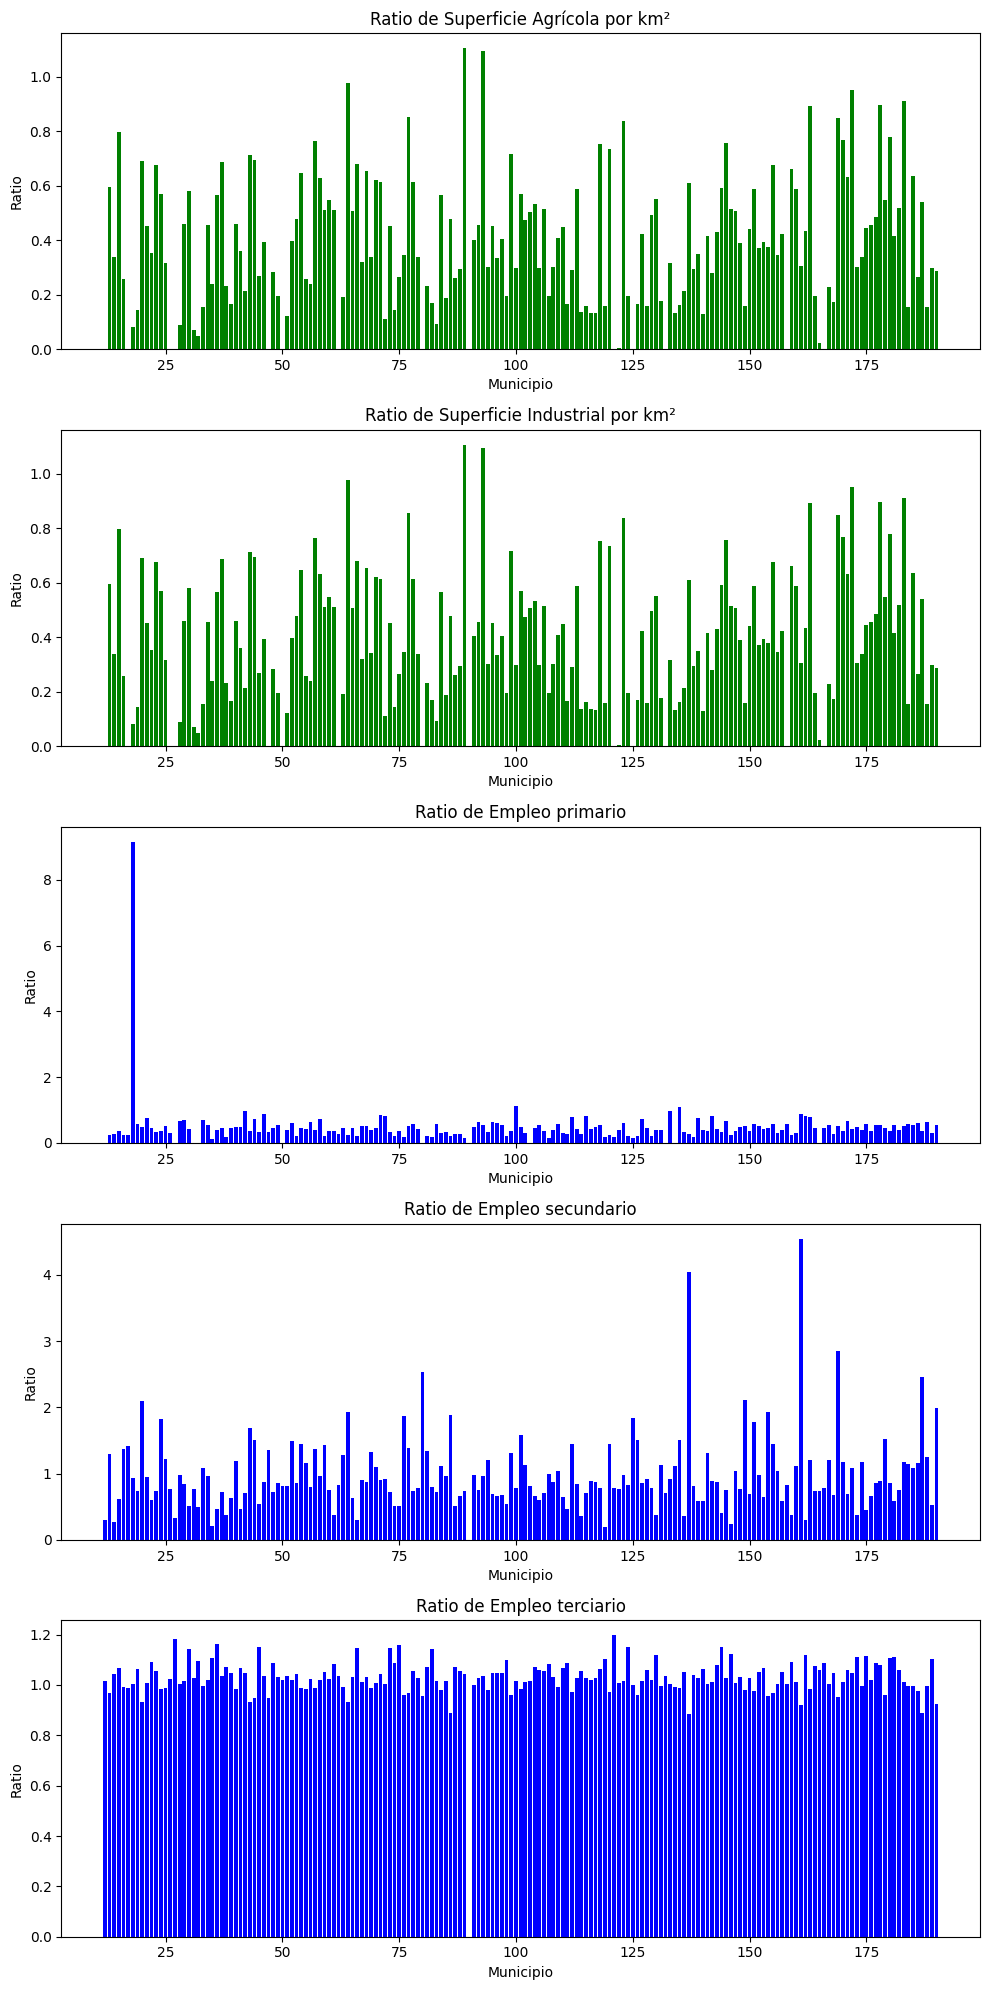

In [46]:
# Crear figura y ejes
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# Gráfico de barras para superficie agrícola ratio
axs[0].bar(clustering_data.index, clustering_data['superficie_agricola_ratio'], color='green')
axs[0].set_title('Ratio de Superficie Agrícola por km²')
axs[0].set_xlabel('Municipio')
axs[0].set_ylabel('Ratio')

# Gráfico de barras para superficie industrial ratio
axs[1].bar(clustering_data.index, clustering_data['superficie_industrial_ratio'], color='green')
axs[1].set_title('Ratio de Superficie Industrial por km²')
axs[1].set_xlabel('Municipio')
axs[1].set_ylabel('Ratio')

# Gráfico de barras para empleo por sector
for i, sector in enumerate(['primario', 'secundario', 'terciario']):
    axs[i + 2].bar(clustering_data.index, clustering_data[f'productividad_{sector}_ratio'], color='blue')
    axs[i + 2].set_title(f'Ratio de Empleo {sector}')
    axs[i + 2].set_xlabel('Municipio')
    axs[i + 2].set_ylabel('Ratio')

# Ajustar diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()

## Clustering

C:\Users\ana\AppData\Local\Temp\ipykernel_16940\1730348845.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['representacion_primario'] = clustering_data['productividad_primario_ratio'] * clustering_data['superficie_agricola_ratio']
C:\Users\ana\AppData\Local\Temp\ipykernel_16940\1730348845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['representacion_secundario'] = clustering_data['productividad_secundario_ratio'] * clustering_data['superficie_industrial_ratio']
C:\U

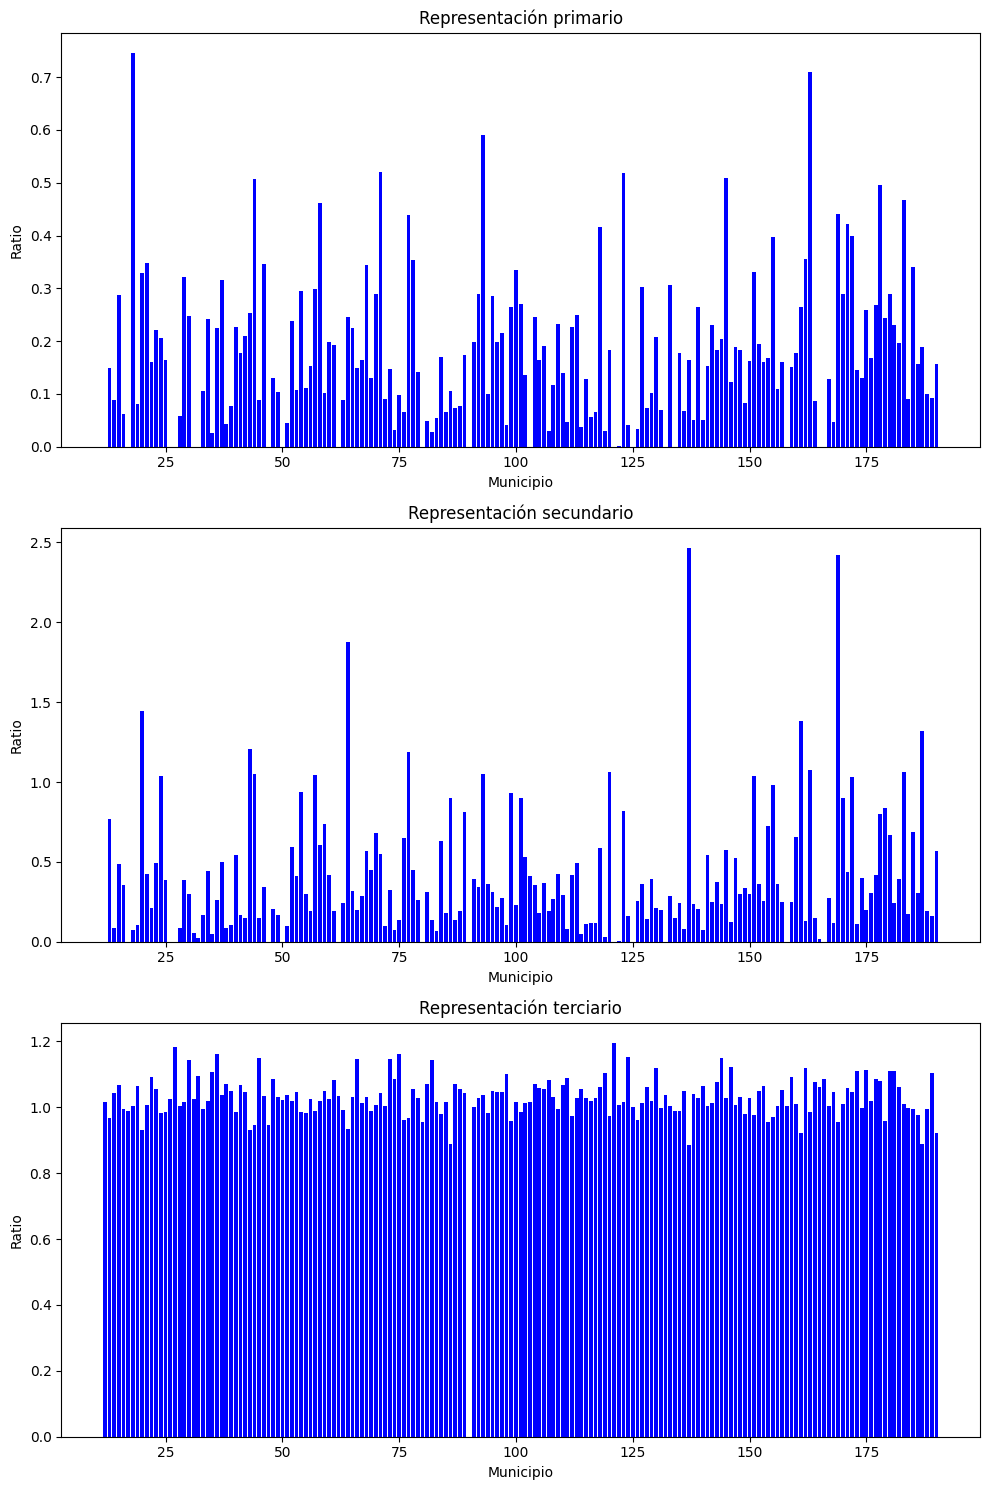

In [47]:
from sklearn.cluster import KMeans

# Calcular las representaciones combinadas para cada fila
clustering_data['representacion_primario'] = clustering_data['productividad_primario_ratio'] * clustering_data['superficie_agricola_ratio']
clustering_data['representacion_secundario'] = clustering_data['productividad_secundario_ratio'] * clustering_data['superficie_industrial_ratio']
clustering_data['representacion_terciario'] = clustering_data['productividad_terciario_ratio']

representaciones = clustering_data[['representacion_primario', 'representacion_secundario', 'representacion_terciario']]

# Crear figura y ejes
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico de barras para empleo por sector
for i, sector in enumerate(['primario', 'secundario', 'terciario']):
    axs[i].bar(clustering_data.index, clustering_data[f'representacion_{sector}'], color='blue')
    axs[i].set_title(f'Representación {sector}')
    axs[i].set_xlabel('Municipio')
    axs[i].set_ylabel('Ratio')



# Ajustar diseño
plt.tight_layout()

# Mostrar gráficos
plt.show()

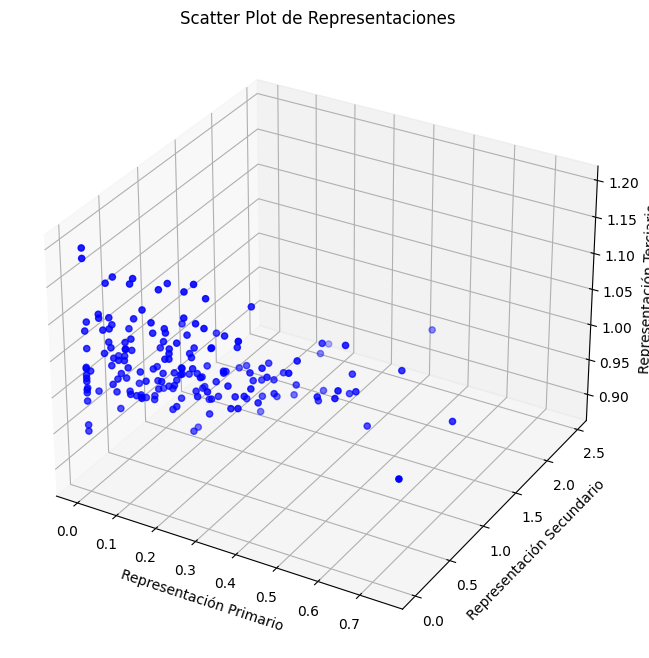

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el subplot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(representaciones['representacion_primario'], representaciones['representacion_secundario'], representaciones['representacion_terciario'], c='blue', marker='o')

# Etiquetas y título
ax.set_xlabel('Representación Primario')
ax.set_ylabel('Representación Secundario')
ax.set_zlabel('Representación Terciario')
ax.set_title('Scatter Plot de Representaciones')

# Mostrar el gráfico
plt.show()


In [49]:
import pandas as pd

# Suponiendo que clustering_data ya tiene los atributos representacion_primario, representacion_secundario y representacion_terciario

# Creamos un DataFrame con los valores representativos de cada sector
sectores = clustering_data[['representacion_primario', 'representacion_secundario', 'representacion_terciario']]

# Obtenemos el nombre del sector con el valor máximo para cada fila
clustering_data['sector'] = sectores.idxmax(axis=1)

# Reemplazamos el nombre del sector por 'primario', 'secundario' o 'terciario'
clustering_data['sector'] = clustering_data['sector'].apply(lambda x: x.replace('representacion_', ''))

# Ahora clustering_data tiene un nuevo atributo 'sector' que indica el sector predominante en cada fila


C:\Users\ana\AppData\Local\Temp\ipykernel_16940\516574367.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['sector'] = sectores.idxmax(axis=1)
C:\Users\ana\AppData\Local\Temp\ipykernel_16940\516574367.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['sector'] = clustering_data['sector'].apply(lambda x: x.replace('representacion_', ''))


In [50]:
clustering_data.to_csv('sector.csv', sep=';', index=False, encoding='latin1')

In [51]:
import pandas as pd

# Suponiendo que clustering_data es el DataFrame que contiene los datos y representaciones de los sectores

# Filtramos la fila con nombre 'arganda del rey'
arganda_del_rey = clustering_data[clustering_data['Nombre'] == 'Arganda del Rey']

# Seleccionamos solo las columnas de representación de los sectores
representaciones = arganda_del_rey[['sup_explotaciones_agricolas_total', 'superficie_agricola_ratio', 'representacion_primario', 'representacion_secundario', 'representacion_terciario']]

print(representaciones)


    sup_explotaciones_agricolas_total  superficie_agricola_ratio  \
25                            2536.56                   0.315966   

    representacion_primario  representacion_secundario  \
25                 0.163805                   0.383479   

    representacion_terciario  
25                  0.986913  
